In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# open file for reading
df = pd.read_csv('C:/Users/nathanaelng/Documents/Big Data/data/data.tsv', sep='\t')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,y
0,0.154163,0.740050,0.263315,0.533739,0.014575,0.918747,0.900715,0.033421,0.956949,0.137209,...,0.552038,0.485377,0.768134,0.160717,0.764560,0.020810,0.135210,0.116273,0.309898,4
1,0.671453,0.471230,0.816168,0.289587,0.733126,0.702622,0.327569,0.334648,0.978058,0.624582,...,0.995138,0.177564,0.962597,0.419250,0.424052,0.463149,0.373723,0.465508,0.035168,1
2,0.084273,0.732521,0.636200,0.027908,0.300170,0.220853,0.055020,0.523246,0.416370,0.048219,...,0.506556,0.461440,0.894743,0.605778,0.603356,0.443872,0.480047,0.888448,0.208500,2
3,0.944581,0.073470,0.595152,0.031151,0.665257,0.637385,0.862465,0.941638,0.445627,0.669958,...,0.405958,0.946556,0.857191,0.688928,0.003288,0.900103,0.919865,0.005909,0.642926,0
4,0.385217,0.595742,0.610807,0.599619,0.312284,0.069874,0.800734,0.911434,0.194675,0.210608,...,0.511643,0.333832,0.778473,0.135435,0.191711,0.402589,0.786844,0.253808,0.109485,4


In [3]:
# quick check of data for bad values
df.isnull().any().unique()

array([False])

In [4]:
# get summary statistics of each column
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,y
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,0.497304,0.502665,0.494937,0.498304,0.501472,0.504679,0.502632,0.499407,0.495460,0.499237,...,0.497412,0.500115,0.501384,0.501765,0.497140,0.497470,0.499237,0.498291,0.496232,2.020111
std,0.290409,0.289843,0.288788,0.286637,0.288131,0.289102,0.287540,0.288869,0.289056,0.288372,...,0.286118,0.288745,0.289646,0.287908,0.288010,0.287861,0.288167,0.288428,0.288114,1.612578
min,0.000026,0.000091,0.000004,0.000010,0.000005,0.000062,0.000006,0.000028,0.000012,0.000048,...,0.000058,0.000128,0.000040,0.000026,0.000014,0.000168,0.000021,0.000010,0.000043,0.000000
25%,0.240962,0.253728,0.246218,0.252312,0.251826,0.252435,0.255710,0.251519,0.245556,0.250151,...,0.251903,0.248230,0.250217,0.251861,0.246225,0.250668,0.250327,0.250790,0.243292,0.000000
50%,0.496238,0.502369,0.490495,0.496277,0.502624,0.506538,0.507741,0.496520,0.492493,0.498656,...,0.498069,0.500429,0.504257,0.505242,0.496341,0.496479,0.498202,0.494509,0.493672,2.000000
75%,0.748868,0.756205,0.743803,0.745595,0.751564,0.757874,0.747887,0.750581,0.744890,0.750107,...,0.743419,0.751228,0.753663,0.750703,0.745228,0.743042,0.749365,0.746697,0.745620,4.000000
max,0.999991,0.999966,0.999946,0.999900,0.999964,0.999948,0.999886,0.999654,0.999985,0.999977,...,0.999968,0.999933,0.999833,0.999909,0.999993,0.999900,0.999859,0.999962,0.999877,4.000000


In [5]:
#### quick column manipulation for easy access later ####

# split the columns into input(X) output(Y)
X = df.iloc[:,range(0,25)] 
Y = df["y"] 

#### ONE-HOT ENCODE ####
# create copy since we're changing columns
df_e = df.copy()

# one-hot encoding, maintain same datatype
Y_e = pd.get_dummies(Y.values, prefix='y', dtype=np.float64)

# replace y in original DataFrame
df_e = df_e.drop("y", axis=1)
df_e = pd.concat([df_e, Y_e],axis=1)

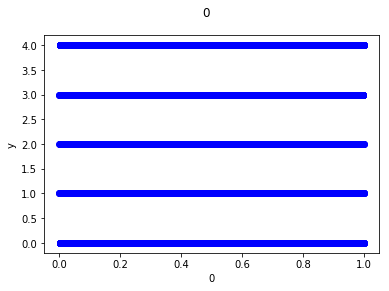

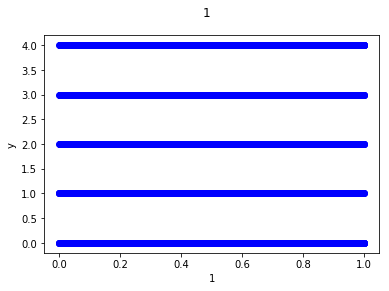

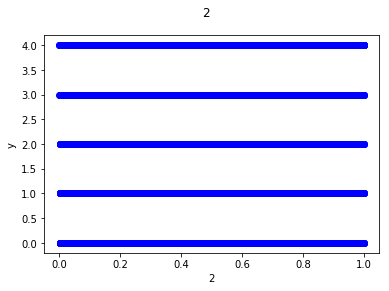

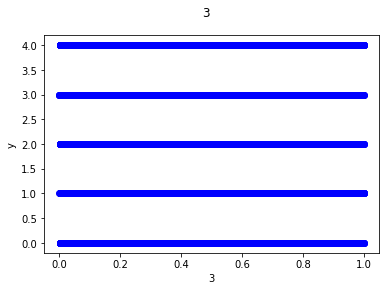

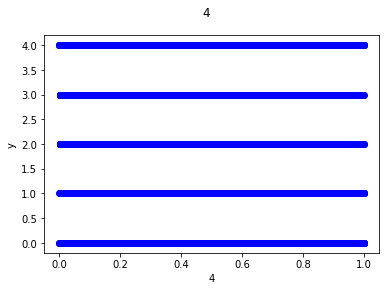

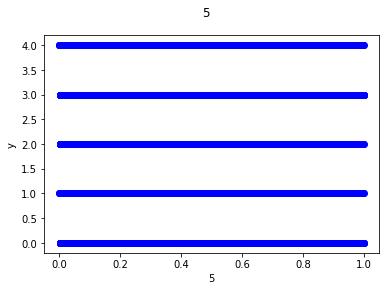

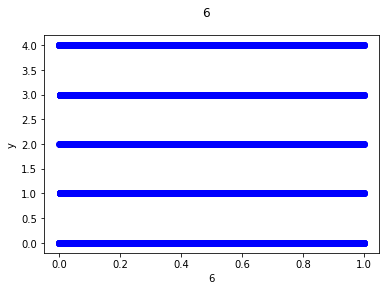

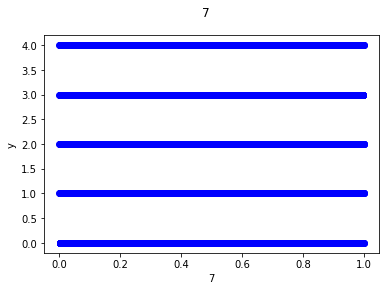

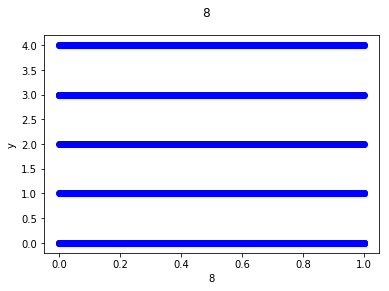

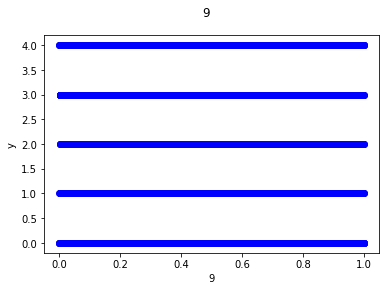

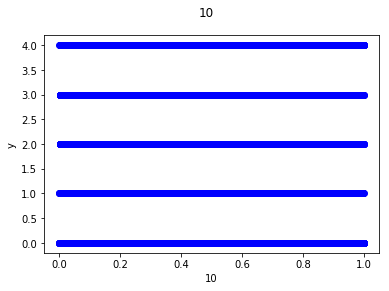

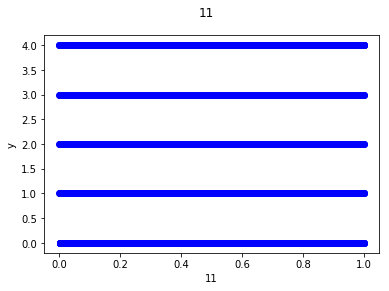

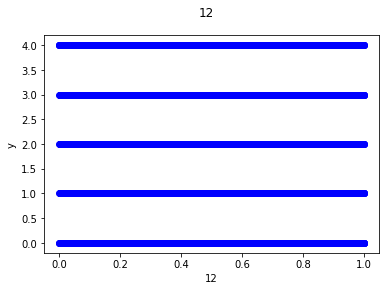

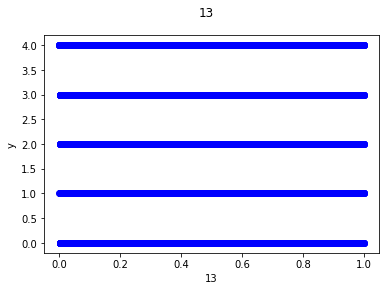

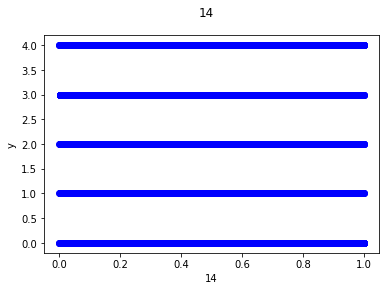

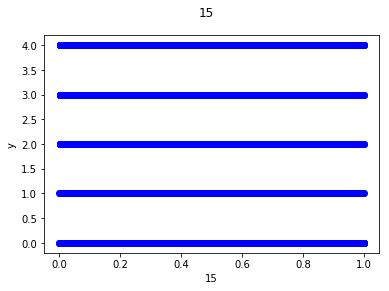

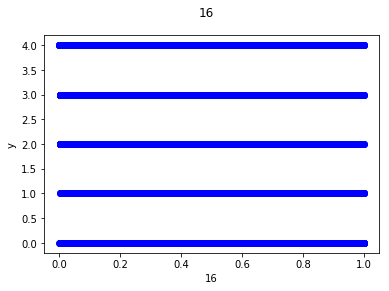

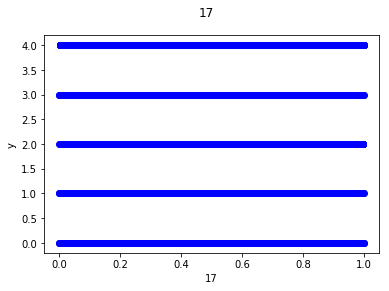

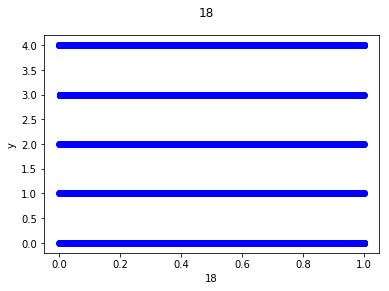

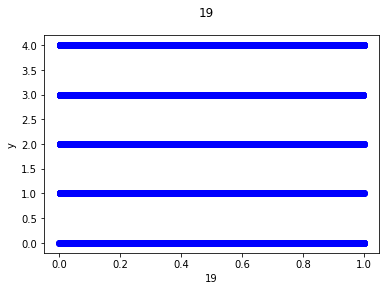

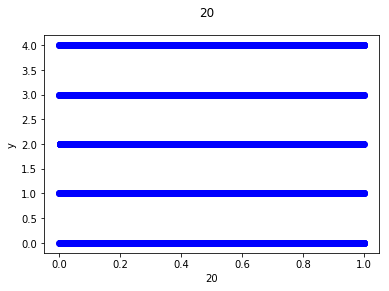

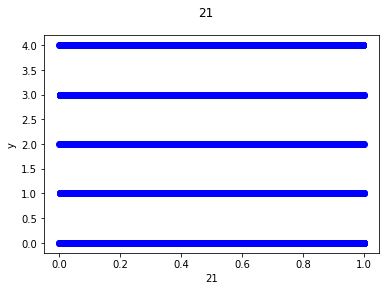

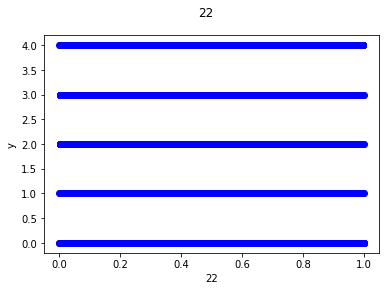

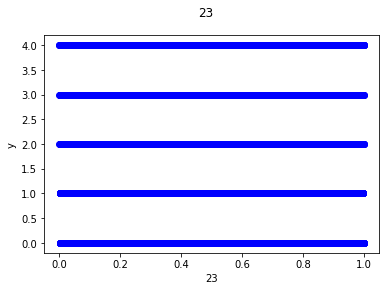

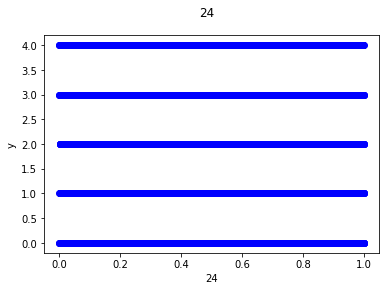

In [6]:
# simple scatter plots of input cols and y
for col in X.columns:
    pyplot.plot(df[col], Y, 'bo')
    pyplot.suptitle(col)
    pyplot.xlabel(col)
    pyplot.ylabel("y")
    pyplot.show()

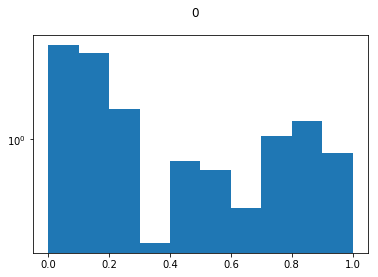

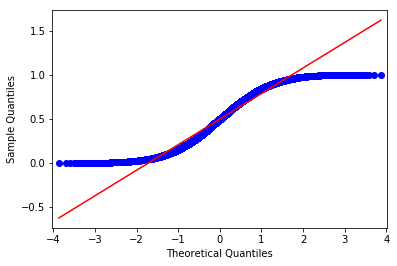

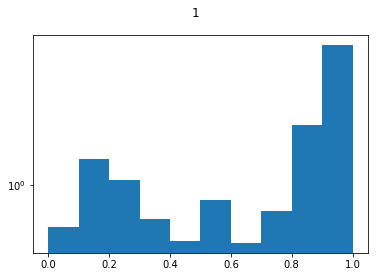

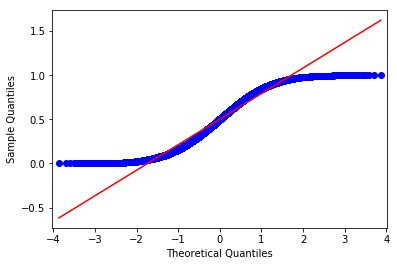

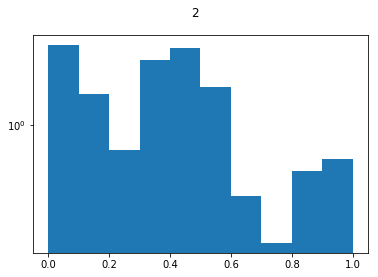

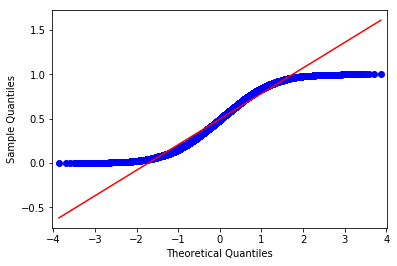

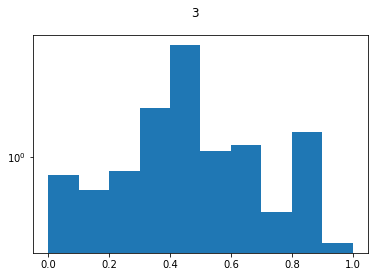

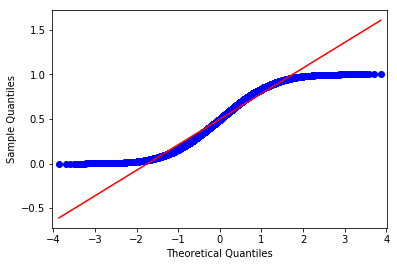

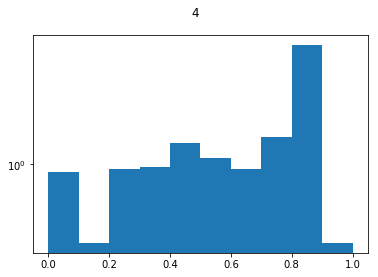

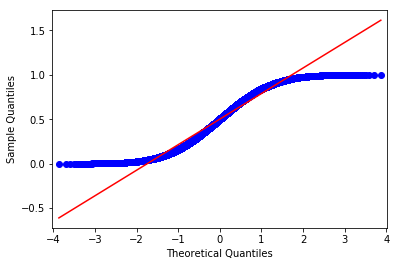

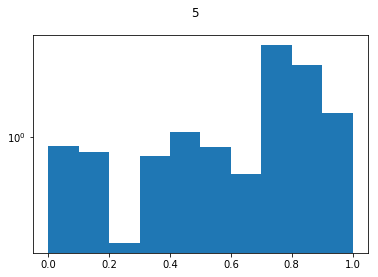

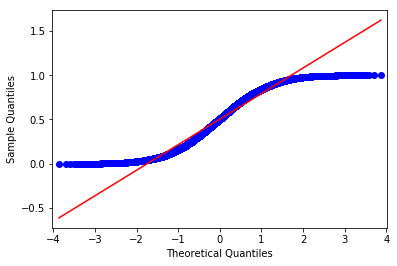

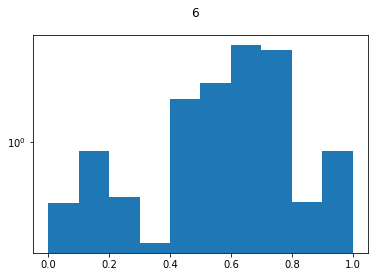

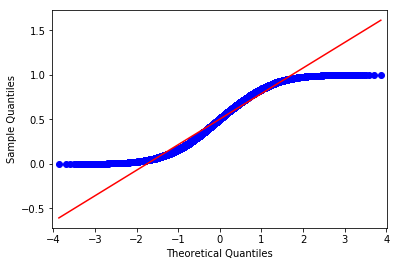

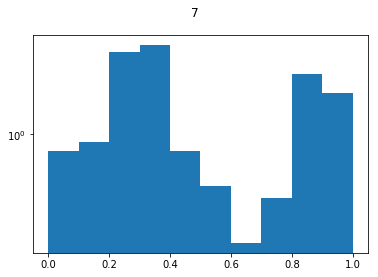

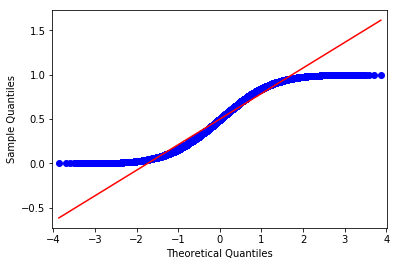

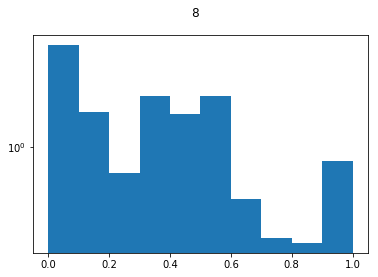

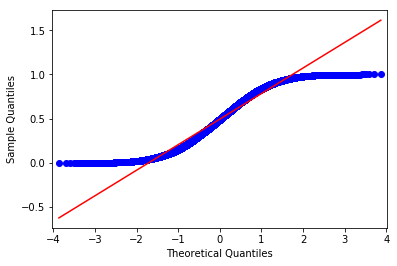

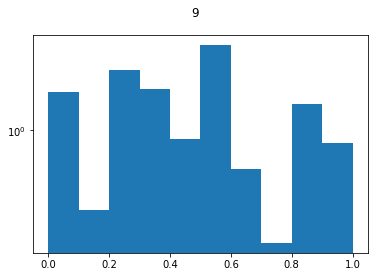

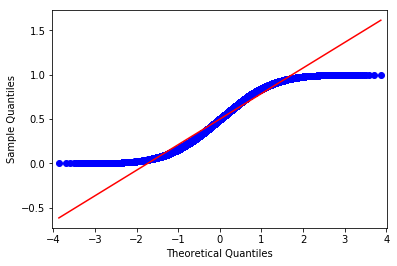

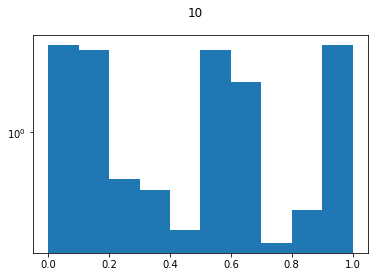

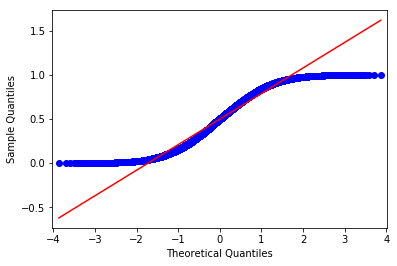

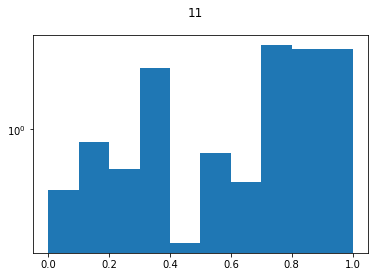

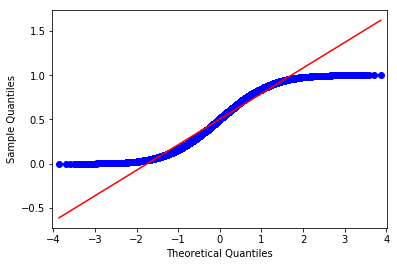

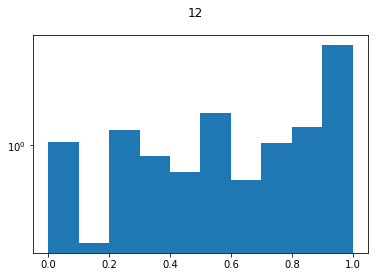

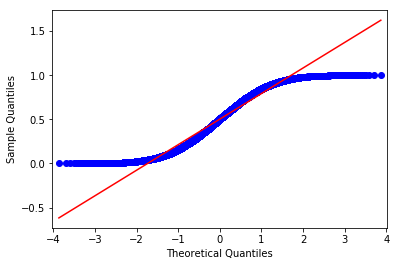

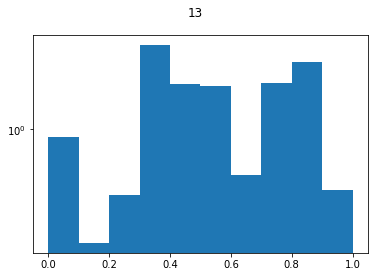

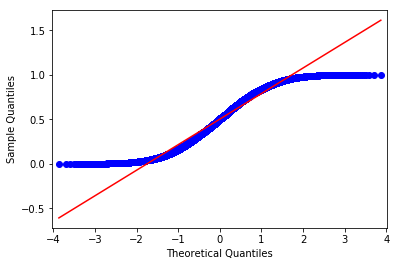

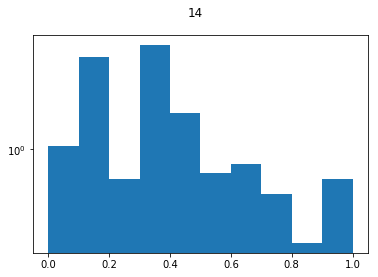

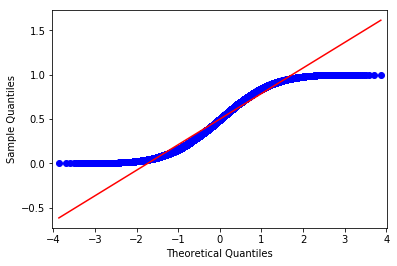

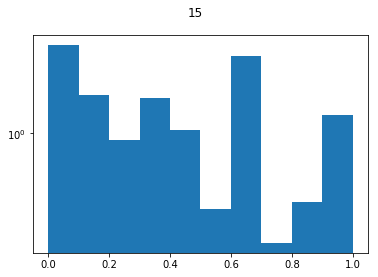

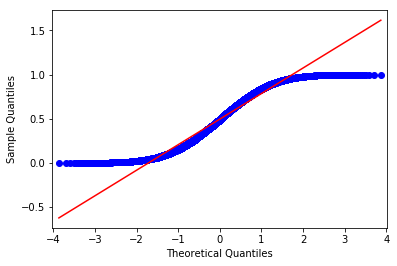

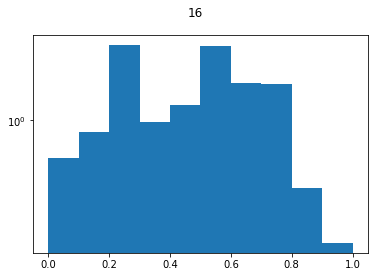

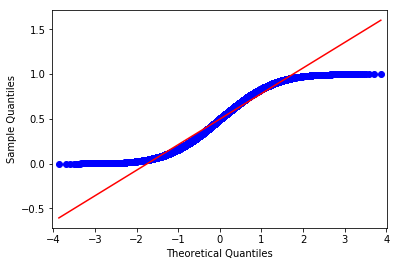

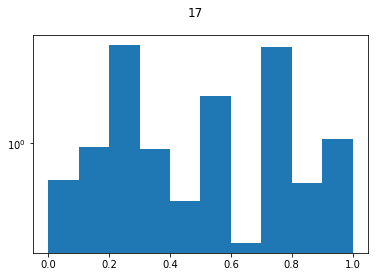

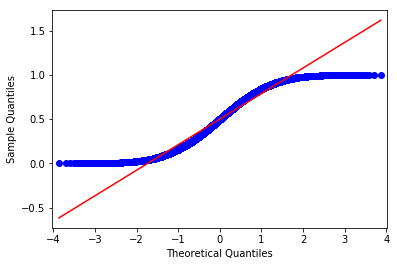

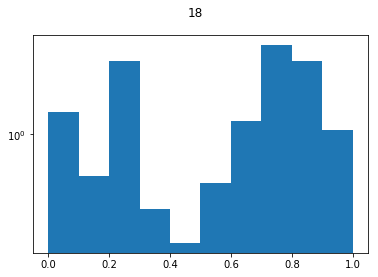

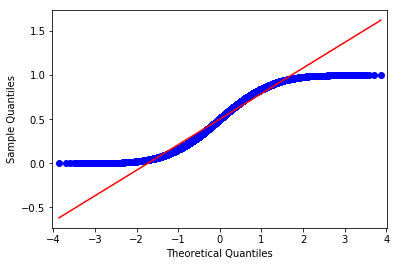

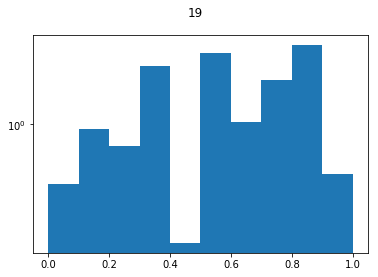

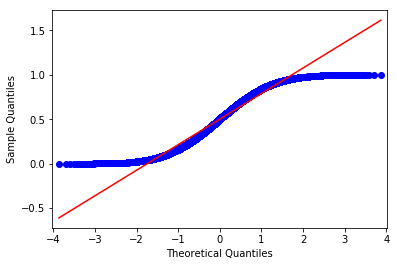

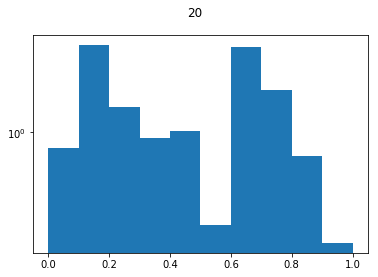

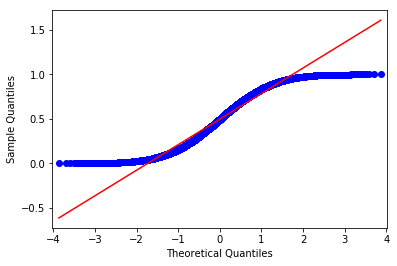

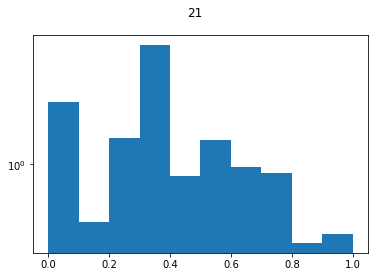

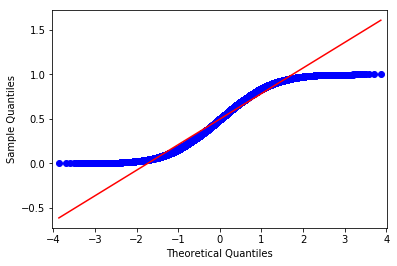

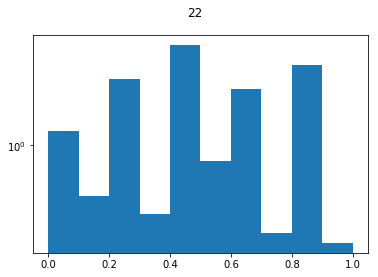

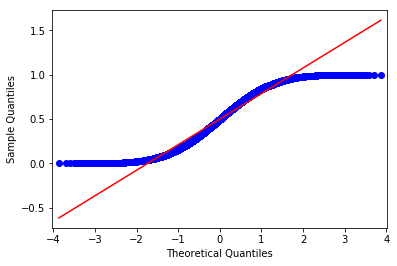

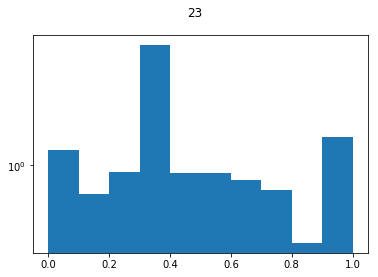

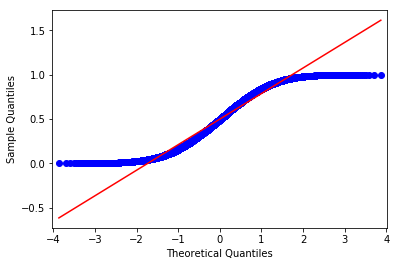

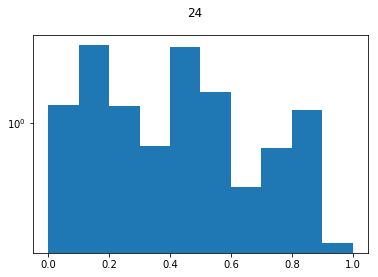

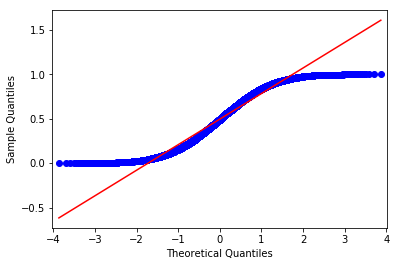

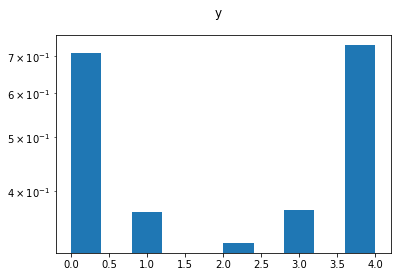

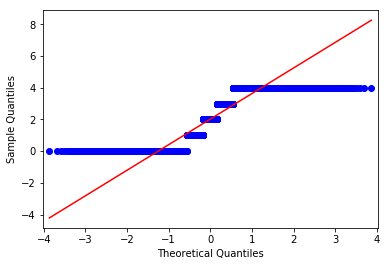

In [7]:
# visual checks for normality
from statsmodels.graphics.gofplots import qqplot
for col in df.columns:
    pyplot.hist(x=df[col], log=True, density=True)
    pyplot.suptitle(col)
    pyplot.show()
    qqplot(df[col], line='s')
    pyplot.show()

In [8]:
#### repeated functions #### 
def residuals(test, pred):
    """ Calculates and plots the residuals
        @param test List of test cases
        @param pred List of predicted results
    """
    res = test - pred
    pyplot.scatter(pred, res, color='blue')
    pyplot.xlabel('Predicted')
    pyplot.ylabel('Residual')
    pyplot.show()

def mse(test, pred):
    """ Calculates the Mean Squared Error
        @param test List of test cases (actual observations)
        @param pred List of predicted results
        @retval mse MSE value
    """
    value = mean_squared_error(test, pred)
    print('MSE: ', value)
    return value

def display(test, pred):
    # plot + display results
    pyplot.scatter(pred, test, color='blue')
    pyplot.plot(test, test, color='red', linewidth=2) # plotting y = x for reference
    pyplot.xlabel('Predicted')
    pyplot.ylabel('Actual')
    pyplot.show()
    
    # metrics
    mse(test, pred)
    residuals(test, pred)

    # hist plots of actual/predicted results
    # view distribution of predictions for comparison 
    pyplot.hist(pred, density=True, bins=5)
    pyplot.suptitle('Predicted')
    pyplot.show()

    pyplot.hist(test, density=True, bins=5)
    pyplot.suptitle('Actual')
    pyplot.show()

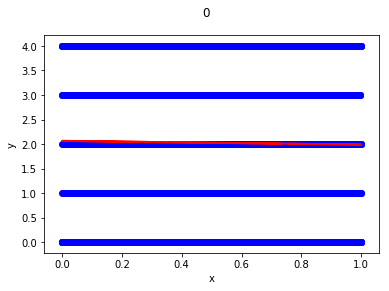

Coeff:  [[-0.0760735]]
Intercept:  [2.06521677]
MSE:  2.609074074074074


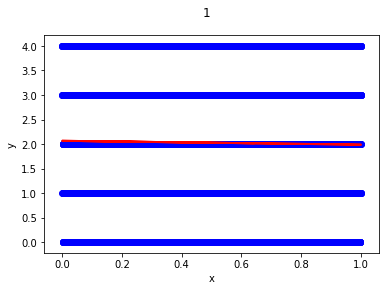

Coeff:  [[-0.07914427]]
Intercept:  [2.06717538]
MSE:  2.609074074074074


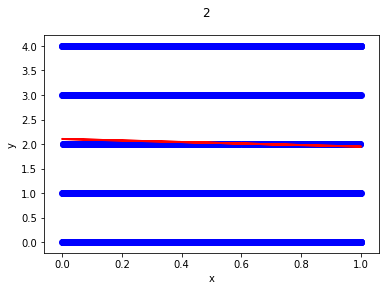

Coeff:  [[-0.15563799]]
Intercept:  [2.10431589]
MSE:  2.609074074074074


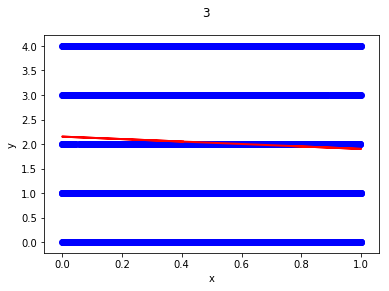

Coeff:  [[-0.25046793]]
Intercept:  [2.15207751]
MSE:  2.609074074074074


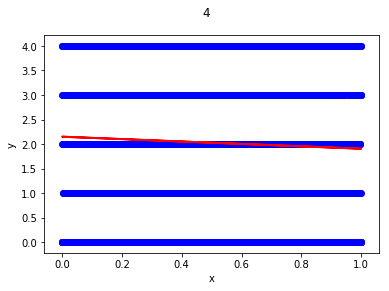

Coeff:  [[-0.24526346]]
Intercept:  [2.15054814]
MSE:  2.609074074074074


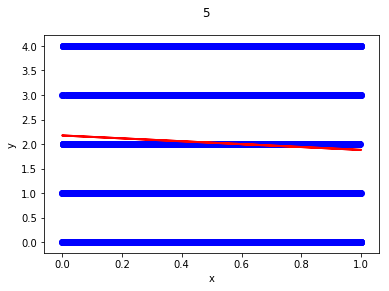

Coeff:  [[-0.29444876]]
Intercept:  [2.17556022]
MSE:  2.609074074074074


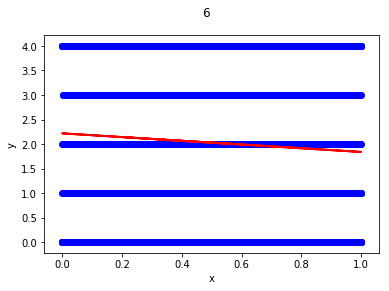

Coeff:  [[-0.3792198]]
Intercept:  [2.21881144]
MSE:  2.609074074074074


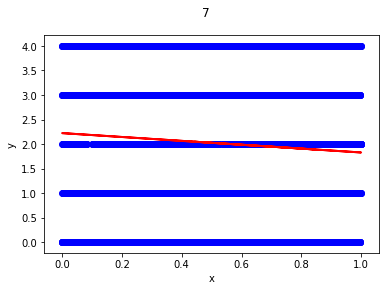

Coeff:  [[-0.39491333]]
Intercept:  [2.22362028]
MSE:  2.609074074074074


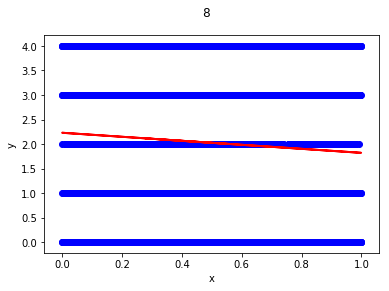

Coeff:  [[-0.40917422]]
Intercept:  [2.23077681]
MSE:  2.609074074074074


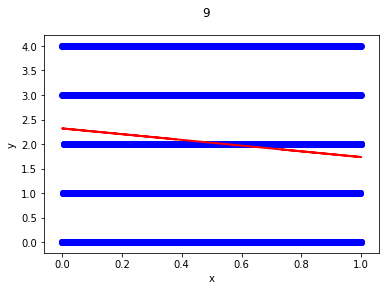

Coeff:  [[-0.58403979]]
Intercept:  [2.31906229]
MSE:  2.609074074074074


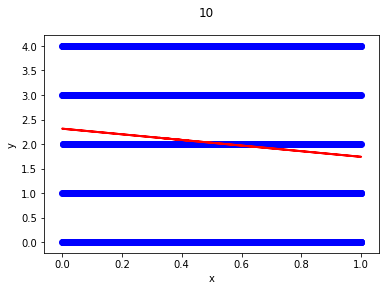

Coeff:  [[-0.57364389]]
Intercept:  [2.31397928]
MSE:  2.609074074074074


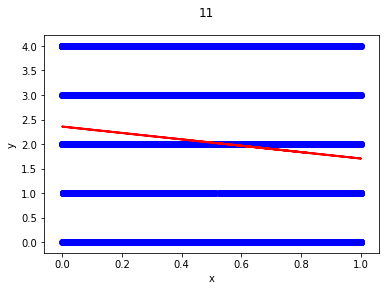

Coeff:  [[-0.65180262]]
Intercept:  [2.35692914]
MSE:  2.609074074074074


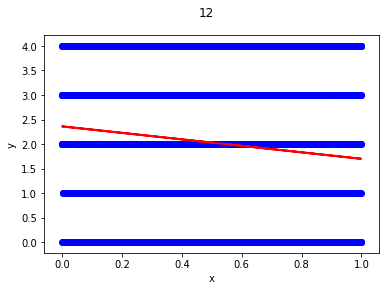

Coeff:  [[-0.66076144]]
Intercept:  [2.36069729]
MSE:  2.609074074074074


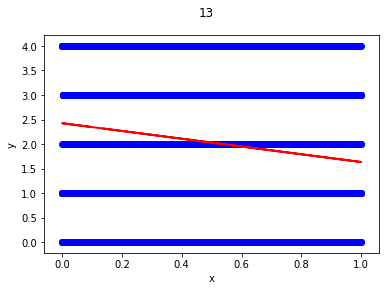

Coeff:  [[-0.79152171]]
Intercept:  [2.42567141]
MSE:  2.609074074074074


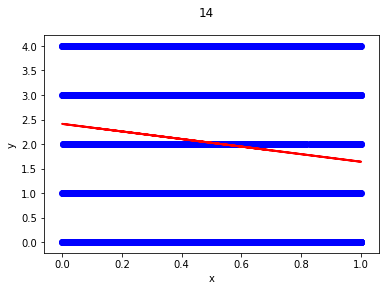

Coeff:  [[-0.77211134]]
Intercept:  [2.4118497]
MSE:  2.609074074074074


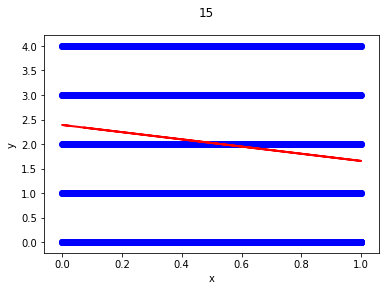

Coeff:  [[-0.73396016]]
Intercept:  [2.39010783]
MSE:  2.609074074074074


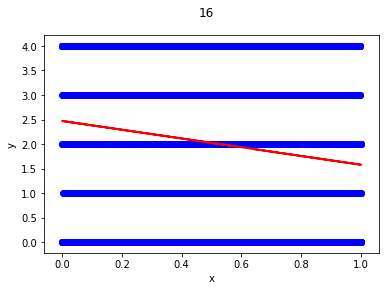

Coeff:  [[-0.89253845]]
Intercept:  [2.47096432]
MSE:  2.609074074074074


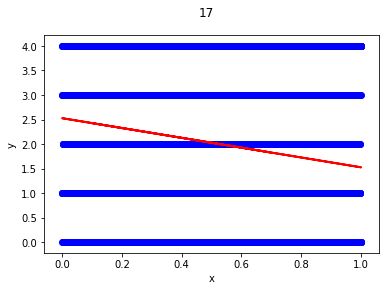

Coeff:  [[-1.00184411]]
Intercept:  [2.52789261]
MSE:  2.609259259259259


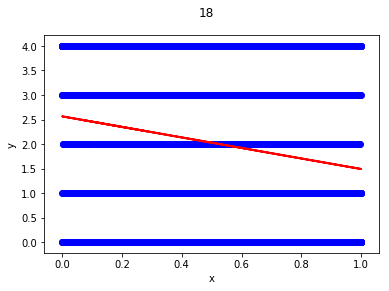

Coeff:  [[-1.07307554]]
Intercept:  [2.56471323]
MSE:  2.612037037037037


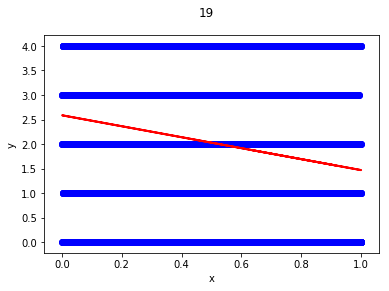

Coeff:  [[-1.11800508]]
Intercept:  [2.58732861]
MSE:  2.6042592592592593


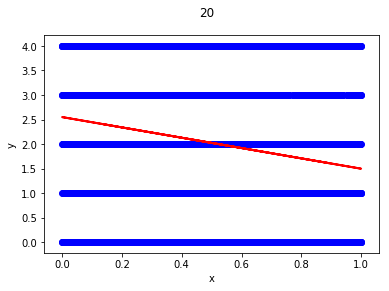

Coeff:  [[-1.05183029]]
Intercept:  [2.55022646]
MSE:  2.604814814814815


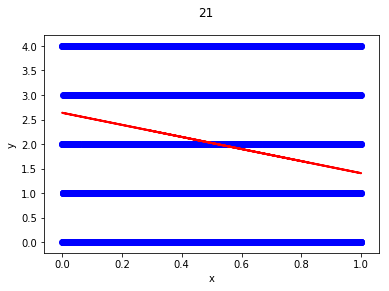

Coeff:  [[-1.23153289]]
Intercept:  [2.63817097]
MSE:  2.6105555555555555


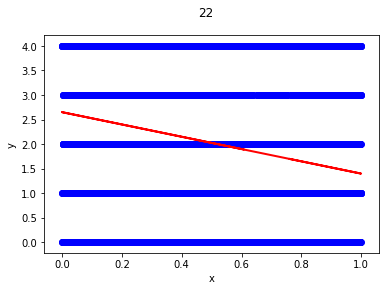

Coeff:  [[-1.25230587]]
Intercept:  [2.65037692]
MSE:  2.597962962962963


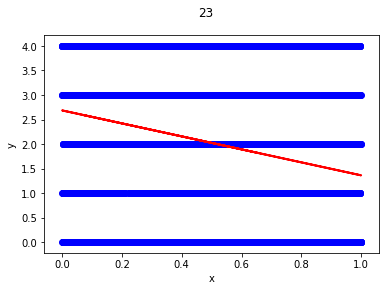

Coeff:  [[-1.3232623]]
Intercept:  [2.68627025]
MSE:  2.585


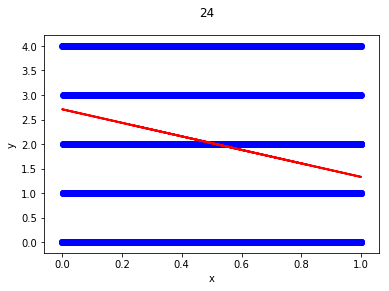

Coeff:  [[-1.3795088]]
Intercept:  [2.70953201]
MSE:  2.5862962962962963


" Visually, there doesn't appear to be a linear relationship "

In [9]:
#### Linear Regression ####
""" Attempting to look for a linear relationships
    between individual inputs and the output. 
"""
from sklearn import linear_model
y = Y.values.reshape(-1, 1)
# loop through all input columns
for col in X.columns:
    x = X[col].values.reshape(-1, 1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

    linear = linear_model.LinearRegression(n_jobs=-1)
    linear.fit(x_train, y_train)
    linear.score(x_train, y_train)

    # make the predictions
    y_pred = linear.predict(x_test)

    # plot + display results 
    pyplot.scatter(x_test, y_test, color='blue')
    pyplot.plot(x_test, y_pred, color='red', linewidth=2) 
    pyplot.suptitle(col)
    pyplot.xlabel('x')
    pyplot.ylabel('y')
    pyplot.show()
    
    print('Coeff: ', linear.coef_)
    print('Intercept: ', linear.intercept_)
    
    mse(y_test, np.round(y_pred))

""" Visually, there doesn't appear to be a linear relationship """

In [10]:
#### split #### 
x_train, x_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=0.3, random_state=0)

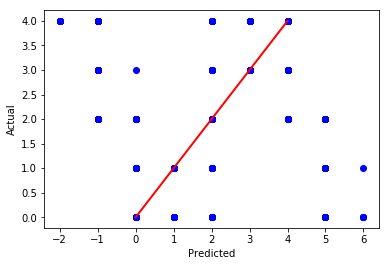

MSE:  1.3574074074074074


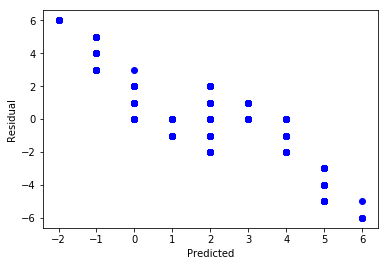

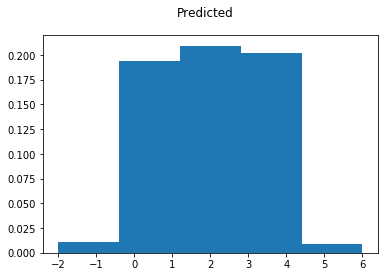

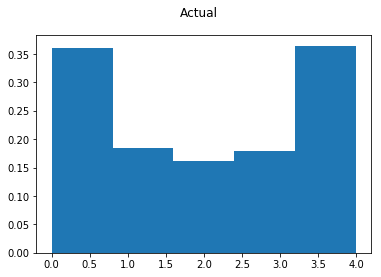

Coeff:  [-0.07531085 -0.09746245 -0.15761405 -0.22187464 -0.28055576 -0.27700751
 -0.33509618 -0.40181367 -0.48700745 -0.53931098 -0.60591321 -0.62697748
 -0.65653148 -0.78538628 -0.7764594  -0.77475773 -0.89915172 -0.9519936
 -1.03721099 -1.08745028 -1.10939641 -1.18871733 -1.25042017 -1.323611
 -1.34889987]
Accuracy of Multiple Linear Regression on training set: 0.51
Accuracy of Multiple Linear Regression on test set: 0.50


In [11]:
#### Multiple Linear Regression #### 
""" Attempting to look for a linear relationships
    between multiple inputs and the output. 
"""
mlr = linear_model.LinearRegression(normalize=True, n_jobs=-1)
mlr.fit(x_train, y_train)
y_pred = np.round(mlr.predict(x_test))

display(y_test, y_pred)

# coefficients
print('Coeff: ', mlr.coef_)

print('Accuracy of Multiple Linear Regression on training set: {:.2f}'
     .format(mlr.score(x_train, y_train)))
print('Accuracy of Multiple Linear Regression on test set: {:.2f}'
     .format(mlr.score(x_test, y_test)))

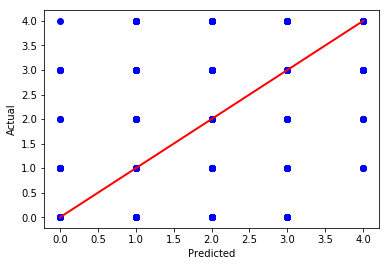

MSE:  1.3962962962962964


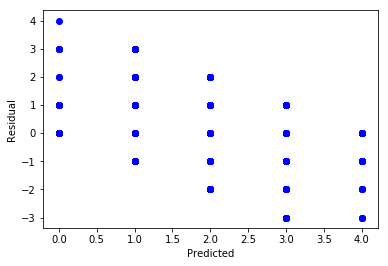

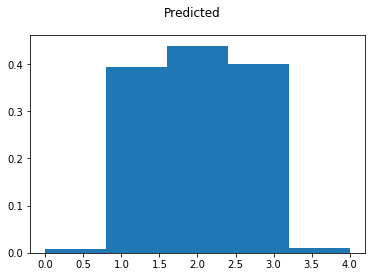

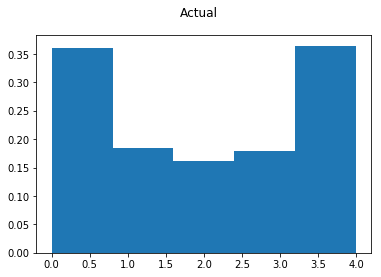

Accuracy of Random Forest regression on training set: 0.93
Accuracy of Random Forest regression on test set: 0.49


' Distribution of the predicted values vs the actual values do not match '

In [12]:
#### Random Forest (regression) ####
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=0, n_jobs=-1)
rfr.fit(x_train, y_train)

# predict on test data
y_pred = np.round(rfr.predict(x_test))

display(y_test, y_pred)

print('Accuracy of Random Forest regression on training set: {:.2f}'
     .format(rfr.score(x_train, y_train)))
print('Accuracy of Random Forest regression on test set: {:.2f}'
     .format(rfr.score(x_test, y_test)))

""" Distribution of the predicted values vs the actual values do not match """

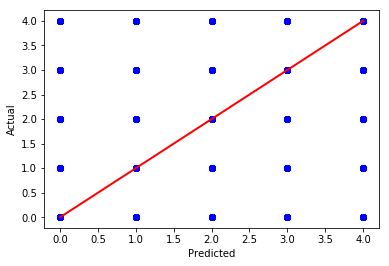

MSE:  2.350925925925926


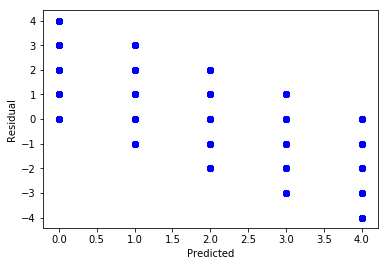

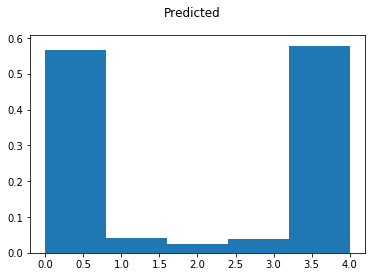

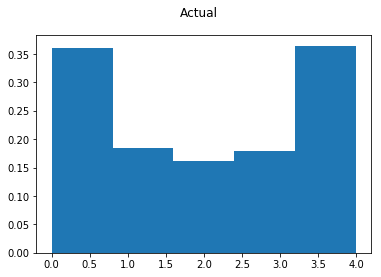

Accuracy of Random Forest classifier on training set: 0.72
Accuracy of Random Forest classifier on test set: 0.51


In [13]:
#### Random Forest (classfication) ####
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, max_depth=10, max_features="sqrt", random_state=0, n_jobs=-1)
rfc.fit(x_train, y_train)

# predict on test data
y_pred = rfc.predict(x_test)

display(y_test, y_pred)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(x_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(x_test, y_test)))


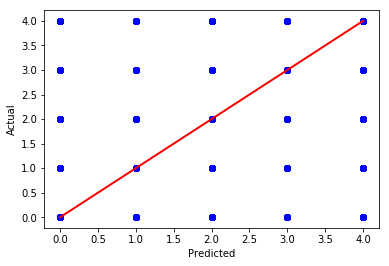

MSE:  1.6027777777777779


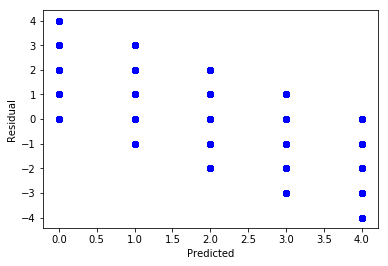

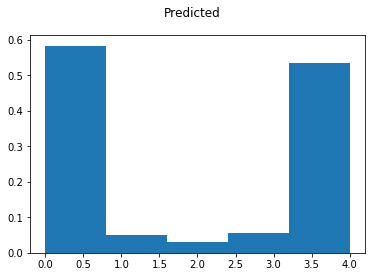

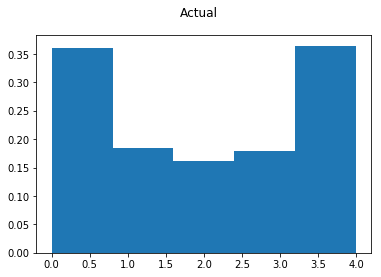

Accuracy of K-NN classifier on training set: 0.58
Accuracy of K-NN classifier on test set: 0.54


In [14]:
# k-Nearest Neighors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20, weights="uniform", n_jobs=-1)
knn.fit(x_train, y_train)

# predict on test data
y_pred = knn.predict(x_test)

display(y_test, y_pred)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

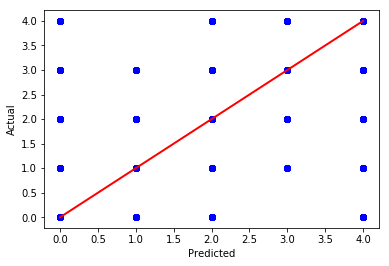

MSE:  0.6551851851851852


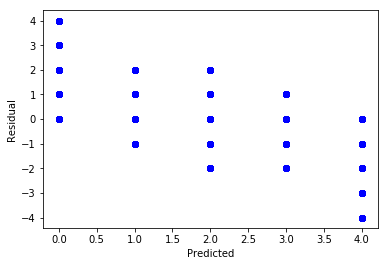

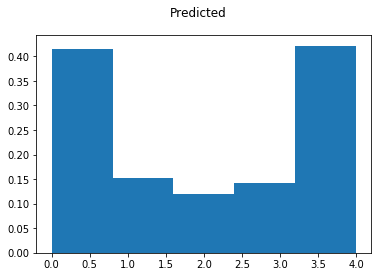

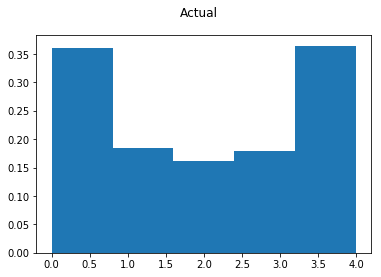

Accuracy of SVM classifier on training set: 0.74
Accuracy of SVM classifier on test set: 0.68


In [15]:
# Support Vector Classification
from sklearn.svm import SVC

svm = SVC(gamma="scale", kernel="poly", degree=2, random_state=0)
svm.fit(x_train, y_train)

# predict on test data
y_pred = svm.predict(x_test)

display(y_test, y_pred)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(x_test, y_test)))